In [1]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
mat = io.loadmat('ex3data1.mat')
X, y = mat['X'], mat['y'].astype('int32')  # 数据集提取出的y为uint8，取负会出问题，所以改为int32

In [3]:
m = np.size(X, 0)
# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100], :]

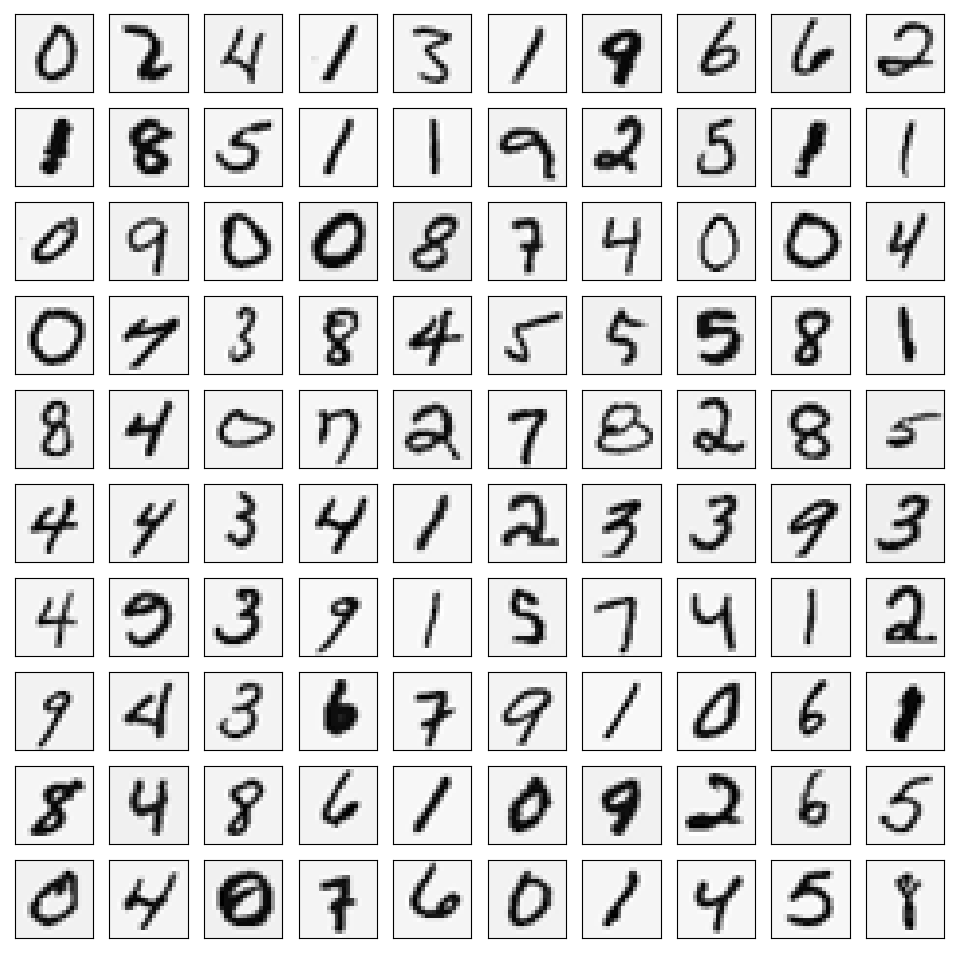

In [4]:
fig, ax = plt.subplots(nrows=10, ncols=10, sharey='all', sharex='all', figsize=(12, 12))
for r in range(10):
	for c in range(10):
		ax[r, c].matshow(sel[10 * r + c].reshape(20, 20).T, cmap=plt.cm.binary)
		plt.xticks([])
		plt.yticks([])

In [5]:
# 输入大负值会overflow，改为下面的方式求值
# def sigmoid(z):
# 	return np.exp(z) / (np.exp(z) + 1)
	# return 1 / (1 + np.exp(-z))

In [6]:
def sigmoid(z):
	tmp = z.copy()
	tmp[z>=0] = 1 / (1 + np.exp(-z[z>=0]))
	tmp[z<0] = np.exp(z[z<0]) / (np.exp(z[z<0]) + 1)
	return tmp

In [7]:
def lrCostFunction(theta, X, y, lambda_opt):
	theta = theta.reshape(-1, 1)

	m = len(y)
	J = np.sum(
		-y.T @ np.log(sigmoid(X @ theta)) - (1 - y).T @ np.log(1 - sigmoid(X @ theta))) / m + lambda_opt * np.sum(
		np.power(theta[1:], 2)) / 2 / m
	temp = theta.copy()
	temp[0] = 0

	grad = (X.T @ (sigmoid(X @ theta) - y) + lambda_opt * temp) / m
	return J, grad

In [8]:
theta_t = np.array([[-2], [-1], [1], [2]])
X_t = np.concatenate((np.ones((5, 1)), np.arange(1, 16).reshape((5, 3), order='F') / 10), axis=1)
y_t = np.array([[1], [0], [1], [0], [1]])
lambda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

In [9]:
J, grad

(2.5348193961097443,
 array([[ 0.14656137],
        [-0.54855841],
        [ 0.72472227],
        [ 1.39800296]]))

In [10]:
a = np.arange(1, 10)
b = 3
print(a == b)

[False False  True False False False False False False]


In [11]:
def lr_cost(theta, X, y, lambda_opt):
	theta = theta.reshape(-1, 1)

	m = X.shape[0]
	J = np.sum(
		(-y.T @ np.log(sigmoid(X @ theta))) - (1 - y).T @ np.log(1 - sigmoid(X @ theta))) / m + lambda_opt * np.sum(
		np.power(theta[1:], 2)) / 2 / m
	return J


def lr_gradient(theta, X, y, lambda_opt):
	theta = theta.reshape(-1, 1)
	m = X.shape[0]

	grad = (X.T @ (sigmoid(X @ theta) - y) + lambda_opt * theta) / m
	grad[0] = (X[:, 0].T @ (sigmoid(X @ theta) - y)) / m
	return grad.ravel()  # 返回向量，否则会报错


def oneVsAll(X, y, num_labels, lambda_opt):
	m, n = X.shape
	all_theta = np.zeros((num_labels, n + 1))
	X = np.concatenate((np.ones((m, 1)), X), axis=1)

	for i in range(1, num_labels + 1):
		initial_theta = np.zeros(n + 1)
		y_i = np.zeros_like(y)
		y_i[y == i] = 1
		# y_i = (y == i).astype('int32').reshape(-1, 1)
		opt = op.fmin_tnc(func=lr_cost, x0=initial_theta, fprime=lr_gradient, args=(X, y_i, lambda_opt))
		all_theta[i - 1, :] = opt[0]

	return all_theta

In [12]:
num_labels = 10;
lambda_opt = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_opt)
all_theta

array([[-3.07602477e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.82816446e-03,  4.65113924e-12,  0.00000000e+00],
       [-3.72891621e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.32785884e-02, -2.55313458e-03,  0.00000000e+00],
       [-5.71269100e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.31972306e-05, -3.63129799e-07,  0.00000000e+00],
       ...,
       [-9.12969539e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.14168177e-04,  6.93243333e-05,  0.00000000e+00],
       [-5.62292047e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.12687164e-02,  8.57562475e-04,  0.00000000e+00],
       [-8.06671278e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.47509709e-05,  9.69442812e-07,  0.00000000e+00]])

In [13]:
def predictOneVsAll(theta, X):
	m = X.shape[0]
	X = np.concatenate((np.ones((m, 1)), X), axis=1)
	p = sigmoid(X @ theta.T)
	p_argmax = np.argmax(p, axis=1, keepdims=True)

	return p_argmax + 1

In [14]:
p = predictOneVsAll(all_theta, X)
print('Train Accuracy: {:.1f}%'.format(np.mean(p == y) * 100))

Train Accuracy: 96.5%


In [15]:
mat = io.loadmat('ex3data1.mat')
X, y = mat['X'], mat['y']
m = X.shape[0]

rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100], :]

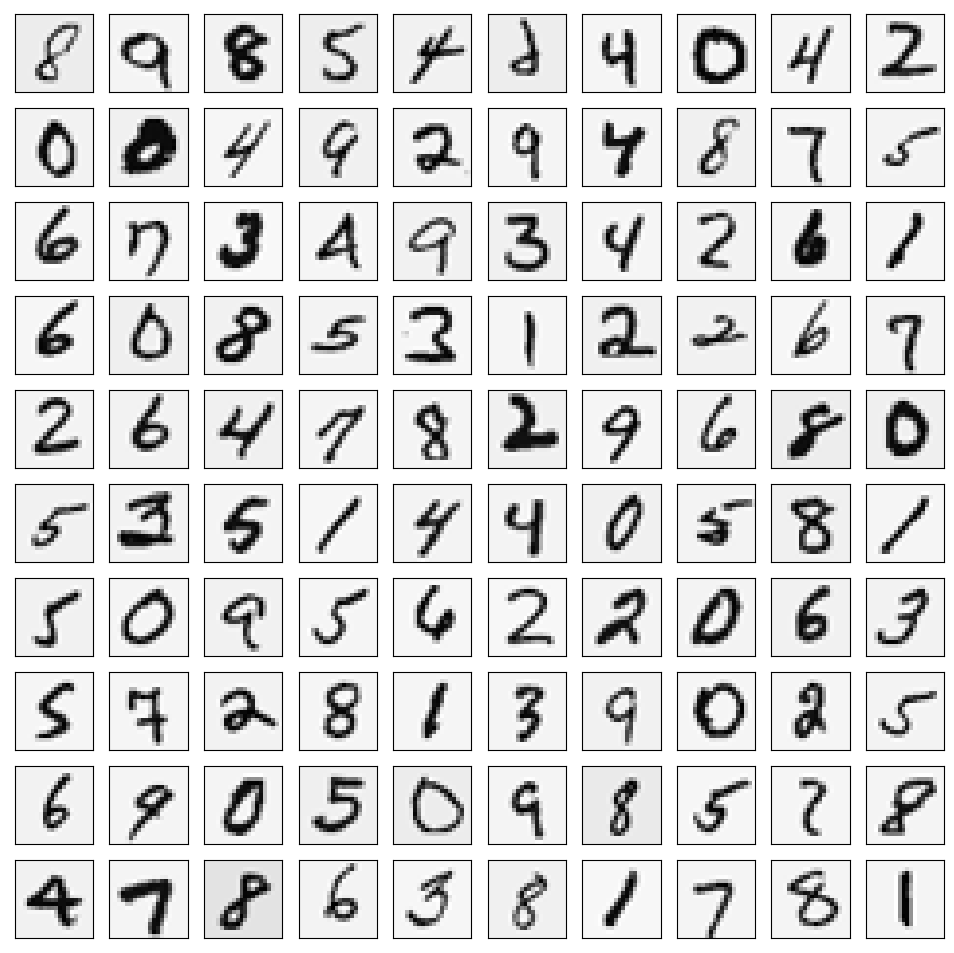

In [16]:
fig, ax = plt.subplots(nrows=10, ncols=10, sharey='all', sharex='all', figsize=(12, 12))
for r in range(10):
	for c in range(10):
		ax[r, c].matshow(sel[10 * r + c].reshape(20, 20).T, cmap=plt.cm.binary)
		plt.xticks([])
		plt.yticks([])

In [17]:
mat_theta = io.loadmat('ex3weights.mat')
Theta1, Theta2 = mat_theta['Theta1'], mat_theta['Theta2']

In [18]:
def predict(theta1, theta2, X):
	m = X.shape[0]
	X = np.concatenate((np.ones((m, 1)), X), axis=1)
	z = sigmoid(X @ theta1.T)
	z = np.concatenate((np.ones((m, 1)), z), axis=1)
	p = sigmoid(z @ theta2.T)
	p_argmax = np.argmax(p, axis=1, keepdims=True)

	return p_argmax + 1

In [19]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 97.5%


In [20]:
rp = np.random.randint(m, size=1)
pred = predict(Theta1, Theta2, X[rp, :])
print('Neural Network Prediction: {} {}'.format(*pred, *pred % 10))

Neural Network Prediction: [5] [5]


([], [])

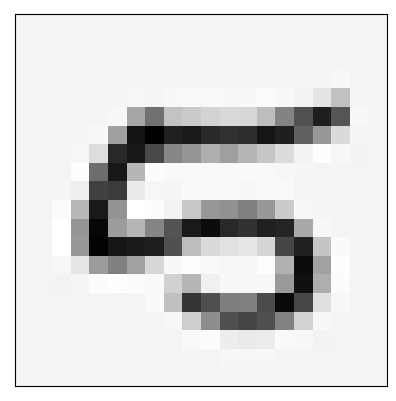

In [21]:
plt.matshow(X[rp, :].reshape(20, 20).T, cmap=plt.cm.binary)
plt.yticks([])
plt.xticks([])